# RETHINKING THE NAME 'TITANIC' FOR SHIPS:
# The Grave Consequences of Ignoring History



Source (Kaggle competition 'Spaceship Titanic'): https://www.kaggle.com/c/spaceship-titanic

**Co-authors**: Ana Arbulo \
            Vivienne May Ordonez \
            Jeel Sanghavi \
            Fatdua Morales \
            Quyen Bao Trinh Nguyen

## Introduction


The world was stunned in 1912 when the Titanic, the "unsinkable" ship, collided with an iceberg and sank on its maiden voyage, killing over 1,500 people. People from various walks of life were among the passengers, from wealthy business people and first-class travelers to third-class immigrants seeking a better life in America. The Titanic has become one of history's most renowned and tragic events in the years since the accident (Eaton & Haas, 1994). 

Many years later, in 2912 the ‘Spaceship Titanic’ was launched. All 13,000 passengers boarded the vessel to emigrate from the Solar System to a new planet. But just like the first Titanic, tragedy strikes. In the vicinity of Alpha Centauri, the spaceship collides with a spacetime anomaly that was hidden in a dust cloud. Unlike its namesake, the spaceship remains intact. However during the turbulence, almost half the passengers have been transported to an alternate dimension. 

In order to ensure that our next voyage is safe and that our passengers make it to their new planets safe and sound, a team of data scientists have been enlisted. They have recollected the data from all passengers of the Spaceship Titanic in order to determine the survival rate, and also to establish an emergency response plan.

## Data Exploration

A number of luxurious amenities were available on the Space Titanic, including VIP access, room service, a food court, a shopping mall, a spa, and a VR deck. Passengers could decide to add these services to their ticket for an additional fee, if they preferred. Individual or group travel options were available. Passengers from all age groups onboarded the vessel and they had the choice to travel in suspended animation while in their cabins. Each passenger had a designated cabin, either on the port or starboard side of the ship, on a distinct deck.

Three destination were visited by the Space Titanic: 55 Cancri E, PSO J318.5-22, and TRAPPIST-1e. Passengers were able to board the vessel from Earth, Mars, and Europa, adding to the diversity of the traveler population.


### Feature Description



1. `PassengerID`: A distinct ID for each passenger. The first four digits indicate whether the passenger are travelling in a group and the last two digits indicate their number within the group.
2. `Name`: First and last name of the passenger.
3. `Age`: Age of the passenger.
4. `HomePlanet`: Indicates the planet where the passenger has departed from, usually their permanent residence.
5. `Destination`: The passenger's destination location.
6. `Cryosleep`: Shows whether the passenger chose to be in a state of suspended animation throughout the voyage. Passengers who opt for cryosleep are confined to their cabins.
7. `Cabin`: The passenger's assigned cabin number in the format of deck/num/side, where side is either P for port or S for starboard.
8. `VIP`: Indicates whether the passenger has paid for VIP service during the voyage.
9. `RoomService`, `FoodCourt`, `ShoppingMall`, `Spa`, `VRDeck`: Charges paid by the passenger to use specified luxury amenities on the Spaceship Titanic.
10. `Transported`: Indicates whether the passenger was transported to another dimension or not. 







### Library import

In [1]:
#### INSTALL DEPENDENCIES IF NEEDED ####



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wrn

# sklearn
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RepeatedStratifiedKFold

# models
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier, GradientBoostingClassifier

import math
#pip install plotly
import plotly as py
#pip install scipy
from scipy.stats import kurtosis, skew
#pip install scikit-optimize

%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_style('darkgrid')

wrn.filterwarnings('ignore')

# Read train and test data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# ANALYSIS : Uncovering the Titanic's Secrets

In [2]:
# initial functions


def missing_vals(data):
    """
    Computes the count and percentage of missing values in the input data.

    Args:
        data (pandas.DataFrame): The input data to analyze.

    Returns:
        pandas.DataFrame: A DataFrame with two columns, 'Total Count' and 'Percentage',
        showing the count and percentage of missing values for each column in the input data.
    """
    total_nulls = data.isnull().sum().sort_values(ascending=False)
    perc_nulls = (round(data.isnull().sum() * 100 / data.isnull().count(),
                        3)).sort_values(ascending=False)

    missing = pd.concat([total_nulls, perc_nulls],
                        axis=1,
                        keys=['Total Count', 'Percentage'])
    return missing


def get_heatmap(dataframe):
    """
    Creates a heatmap of the correlation matrix for the input dataframe.

    Args:
        dataframe (pandas.DataFrame): The input dataframe to create the heatmap for.

    Returns:
        None
    """
    corr = dataframe.corr()
    mask = np.triu(np.ones_like(corr, dtype=bool))
    plt.figure(figsize=(20, 15))
    sns.set(font_scale=1.25)
    sns.heatmap(corr,
                mask=mask,
                vmax=1.0,
                vmin=-1.0,
                linewidths=0.1,
                annot=True,
                annot_kws={"size": 30},
                square=True)
    
# Print the shape of both datasets   
print("train shape:", train.shape)
print("test shape:", test.shape)    

train shape: (8693, 14)
test shape: (4277, 13)


In [3]:
# Compute the count and percentage of missing values in the 'train' dataset
missing_vals(train)

,Total Count,Percentage
CryoSleep,217,2.496
ShoppingMall,208,2.393
VIP,203,2.335
HomePlanet,201,2.312
Name,200,2.301
Cabin,199,2.289
VRDeck,188,2.163
FoodCourt,183,2.105
Spa,183,2.105
Destination,182,2.094


In [4]:
# Compute the count and percentage of missing values in the 'test' dataset
missing_vals(test)

,Total Count,Percentage
FoodCourt,106,2.478
Spa,101,2.361
Cabin,100,2.338
ShoppingMall,98,2.291
Name,94,2.198
CryoSleep,93,2.174
VIP,93,2.174
Destination,92,2.151
Age,91,2.128
HomePlanet,87,2.034


## **1: Histogram Analysis Reveals Age and Amenity Trends for Survival**

---

In order to understand the trends and patterns in the provided datasets, for variables such as age and all amenities, a histogram was plotted. The plotted graph helped in visualizing the distrubtion of passengers for all the variables. The analysis helped understand whether specific age groups and groups with specific amenities were most likely to survive than others. The analysis is based on identifying potential factors influencing survival rate.

For instance, the distribution suggests that there are larger number of passengers between the age of 20 to 40 years. It also shows that majority of the passengers have not chose the amenities such as room service, food court, spa, VR deck, and shopping mall. 

In [5]:
# Select columns with numerical data in the 'train' dataset
numerical = train.select_dtypes(include=[np.number])

# Display the first few rows of the numerical data subset
numerical.head()


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,39.0,0.0,0.0,0.0,0.0,0.0
1,24.0,109.0,9.0,25.0,549.0,44.0
2,58.0,43.0,3576.0,0.0,6715.0,49.0
3,33.0,0.0,1283.0,371.0,3329.0,193.0
4,16.0,303.0,70.0,151.0,565.0,2.0


In [6]:
# Compute summary statistics for the numerical data subset
numerical_summary = numerical.describe()

# Display the summary statistics
numerical_summary


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


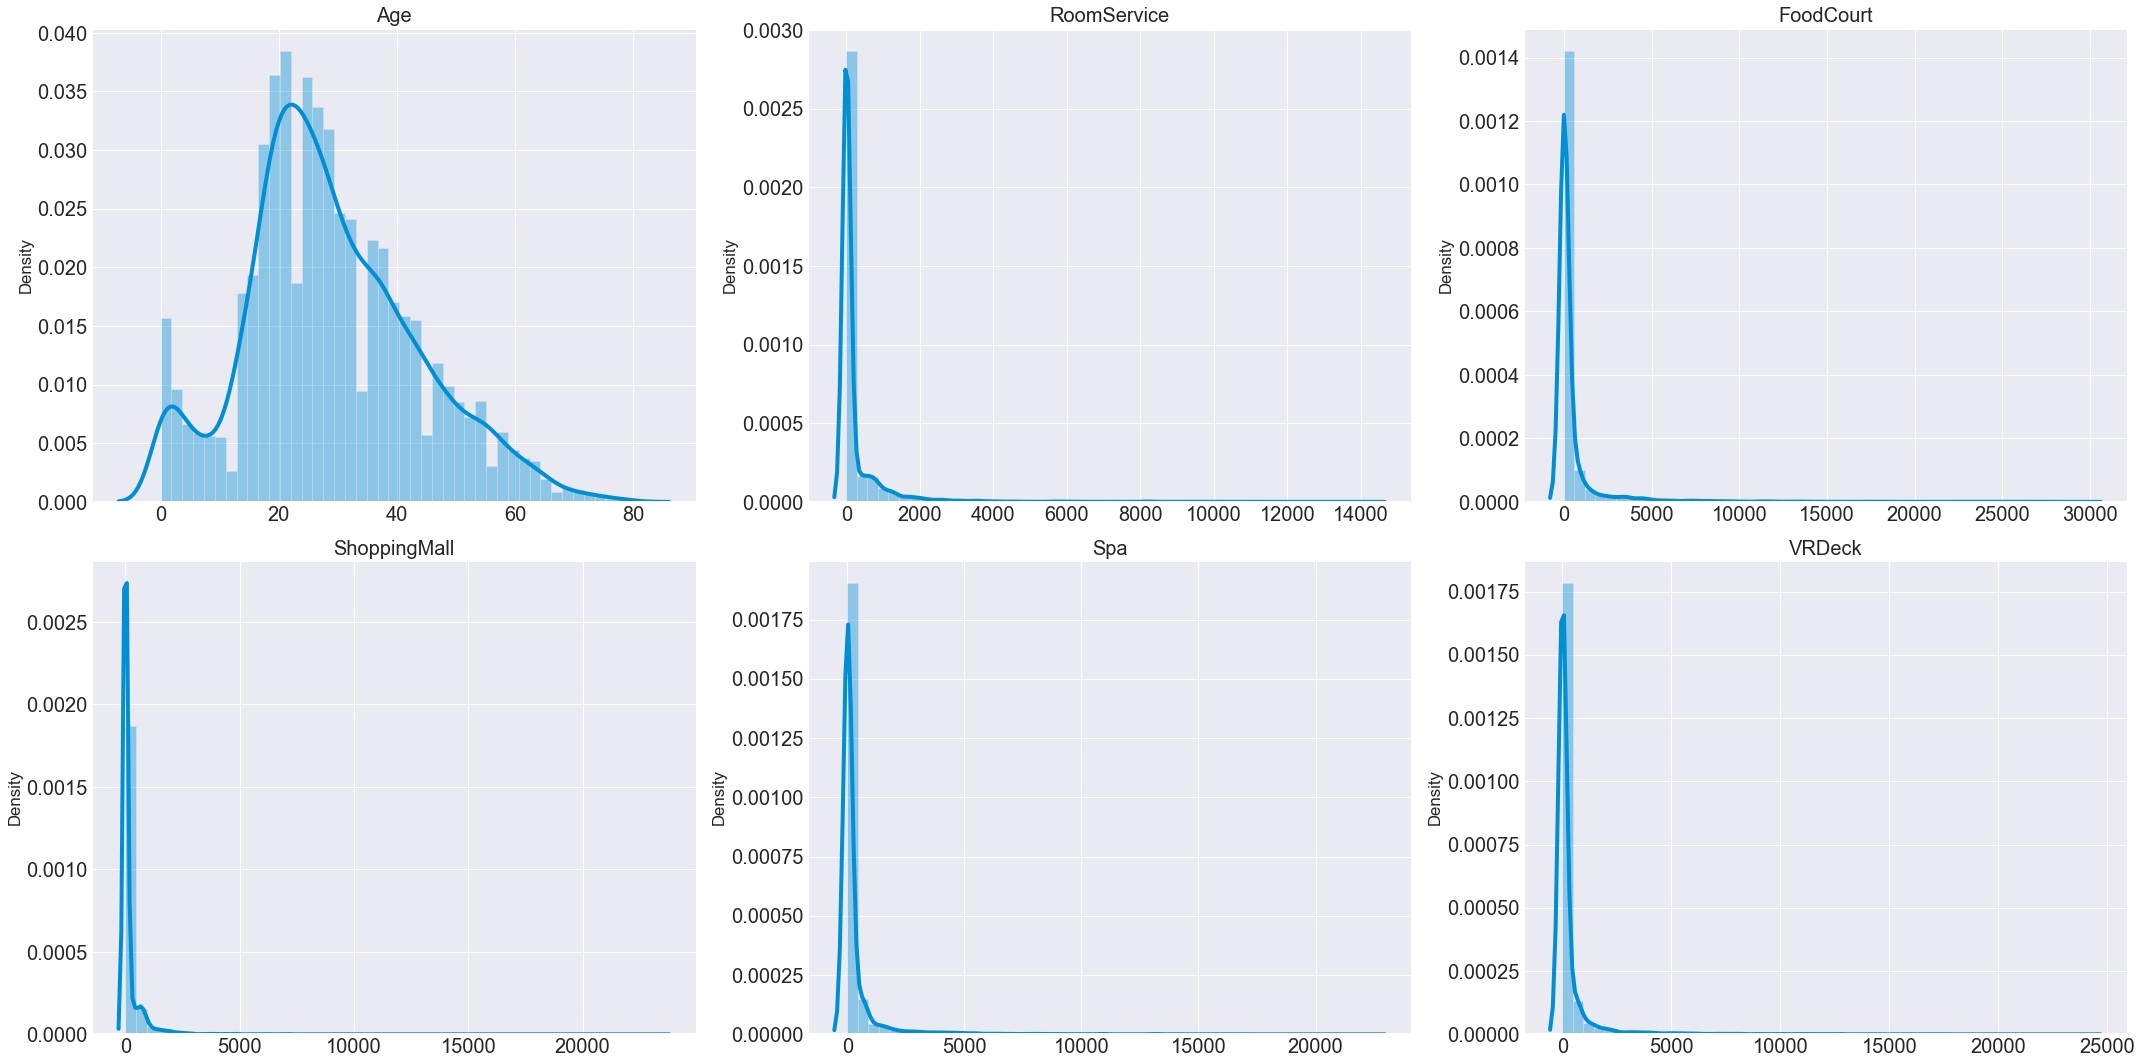

In [7]:
# Create a grid of subplots to display the distribution of numerical data
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(30, 15))

# Plot a histogram of each numerical variable on a separate subplot
for ax, column in zip(axes.flatten(), numerical.columns):
    sns.distplot(numerical[column].dropna(), ax=ax)
    ax.set_title(column, fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=20)
    ax.tick_params(axis='both', which='minor', labelsize=20)
    ax.set_xlabel('')

# Adjust the spacing between subplots to avoid overlapping labels
fig.tight_layout()


## **2: Survived or Left Behind: Analyzing Passengers' Fate**

---

This visualization shows the distribution of passengers who were transported vs not transported based on different features: Home Planet, CryoSleep, Destination Planet, and VIP status. This gives an overview of the proportion of each that got transported during the anomaly. By looking at the plots, we can observe some interesting patterns. 

For instance, we can see that passengers from Europa were significantly more likely to be transported than those from Earth and Mars. Passengers from Earth were the least likely to be transported. Additionally, passengers who were in Cryosleep were transported at a larger proportion than those who were not.

It can also be seen that some Destination Planets had a higher proportion of transported passengers than others, passengers that had TRAPPIST -1e as their destination has less chances of avoiding being transported. Lastly, VIP passengers were more likely to be transported than non-VIP passengers.


In [8]:
# Select columns with categorical data in the 'train' dataset
categorical = train.select_dtypes(exclude=[np.number])

# Display the first few rows of the categorical data subset
categorical.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,False,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,False,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,True,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,False,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,False,Willy Santantines,True


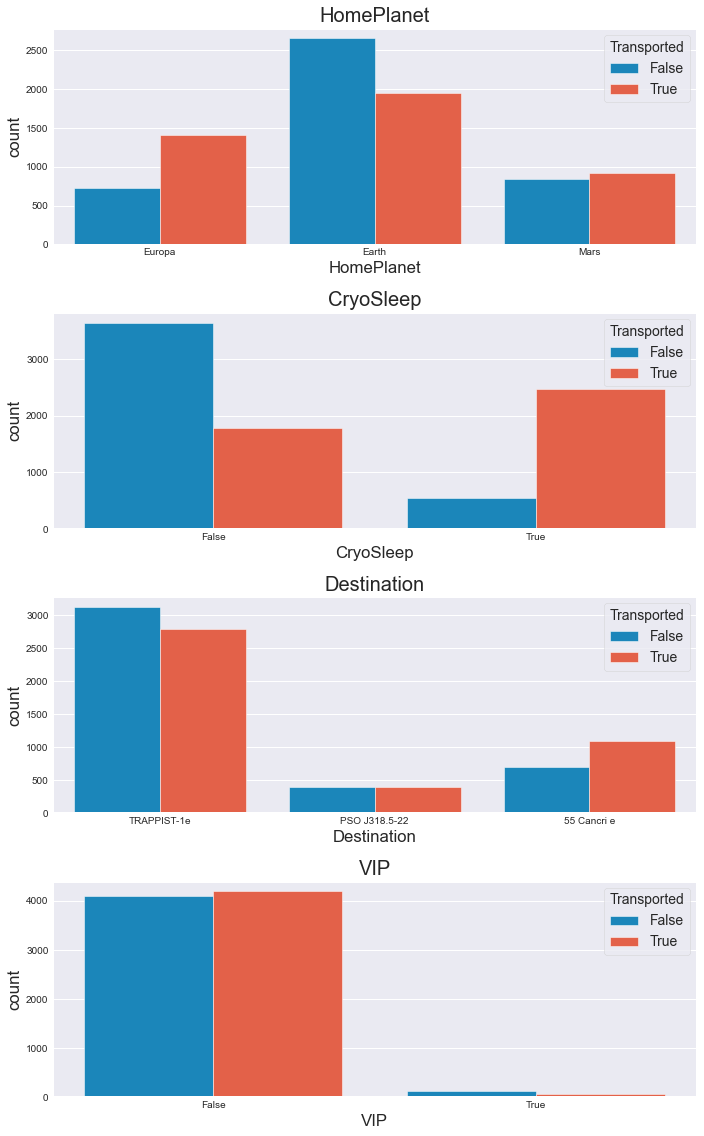

In [9]:
# Define a list of categorical features to plot
categ_feats = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

# Create a figure with a separate subplot for each feature
fig = plt.figure(figsize=(10, 16))

for i, var_name in enumerate(categ_feats):
    ax = fig.add_subplot(4, 1, i + 1)
    sns.countplot(data=train, x=var_name, axes=ax, hue='Transported')
    plt.xticks(fontsize='10', horizontalalignment='center')
    plt.yticks(fontsize = '10')
    ax.set_title(var_name, fontsize = '20')

# Adjust the spacing between subplots to avoid overlapping labels
fig.tight_layout()

In [10]:
# Check for percentage of transported passengers per home planet

categorical[['HomePlanet','Transported']].groupby(['HomePlanet']).mean().applymap('{:,.2%}'.format)

,Transported
HomePlanet,
Earth,42.39%
Europa,65.88%
Mars,52.30%


In [11]:
# Check for percentage of transported passengers per choice of destination

categorical[['Destination','Transported']].groupby(['Destination']).mean().applymap('{:,.2%}'.format)

,Transported
Destination,
55 Cancri e,61.00%
PSO J318.5-22,50.38%
TRAPPIST-1e,47.12%


In [12]:
# Check for percentage of transported passengers depending on CryoSleep status

categorical[['CryoSleep','Transported']].groupby(['CryoSleep']).mean().applymap('{:,.2%}'.format)

,Transported
CryoSleep,
False,32.89%
True,81.76%


In [13]:
# Check for percentage of transported passengers among VIPs

categorical[['VIP','Transported']].groupby(['VIP']).mean().applymap('{:,.2%}'.format)

,Transported
VIP,
False,50.63%
True,38.19%


## **3: Survival: An Age Game?**
---
Another analysis was developed to determine the impact of age groups to the survival rate. The ages of the passengers were categorized into six age groups. The youngest age group is 0-12 years old, and the oldest is 51 and above. The resulting plot shows that the largest age group among the passengers was 18-25 years old, followed by 26-30 and 31-50 years old. One observation was that the vessel was mainly populated by young and middle-aged adults.

Additionally, the analysis determine that the survival rate was relatively high for the youngest age group, which could be due to the  priority given to women and children. However, the survival rate for the other age groups is more ambiguous, and it is difficult to draw clear conclusions from the graph alone. Although, it helped identify that passengers from age group 18-25 are likely to be transported.


Text(0.5, 0, 'Age (years)')

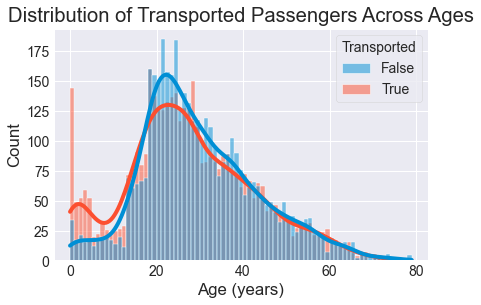

In [14]:
# Create a histogram of passenger ages, colored by transported status
sns.histplot(data=train, x='Age', hue='Transported', binwidth=1, kde=True)

# Add a title and axis label to the plot
plt.title('Distribution of Transported Passengers Across Ages')
plt.xlabel('Age (years)')


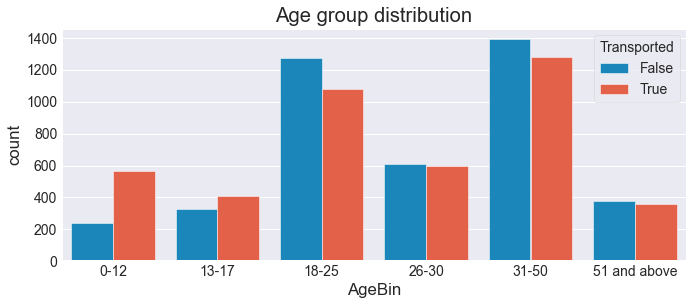

In [15]:
def get_agebin(data):
    """
    Categorizes ages into bins and creates a new column 'AgeBin' in the input DataFrame.

    Args:
    data (pandas.DataFrame): A DataFrame containing an 'Age' column.

    Returns:
    None
    """
    data.loc[data['Age'] <= 12, 'AgeBin'] = "0-12"
    data.loc[(data['Age'] >= 13) & (data['Age'] <= 17), 'AgeBin'] = "13-17"
    data.loc[(data['Age'] >= 18) & (data['Age'] <= 25), 'AgeBin'] = "18-25"
    data.loc[(data['Age'] >= 26) & (data['Age'] <= 30), 'AgeBin'] = "26-30"
    data.loc[(data['Age'] >= 31) & (data['Age'] <= 50), 'AgeBin'] = "31-50"
    data.loc[data['Age'] > 50, 'AgeBin'] = "51 and above"



def plot_age(data):
    """
    Plots the distribution of age groups in the given data.

    Parameters:
    -----------
    data: Pandas DataFrame
        The data to be plotted.

    Returns:
    --------
    None
    """
    plt.figure(figsize=(10, 4))
    age = sns.countplot(
        data=data,
        x='AgeBin',
        hue='Transported',
        order=['0-12', '13-17', '18-25', '26-30', '31-50', '51 and above'])
    plt.title('Age group distribution')


# Apply age binning to the data
get_agebin(train)

# Plot age group distribution
plot_age(train)

In [16]:
# Check for percentage of transported passengers per age bracket

train[['AgeBin','Transported']].groupby(['AgeBin']).mean()

,Transported
AgeBin,
0-12,0.699752
13-17,0.553451
18-25,0.458103
26-30,0.496272
31-50,0.479432
51 and above,0.484396


## **4: Money Talks: How Spending Habits Impacted Survival**


---

This graph shows the passengers who spent no money on the ship, separated by whether they were transported or not. It clearly shows how those passengers that made purchases onboard were significantly less likely to be transported. Once again showing a parallelism with the original Titanic where those of wealth had higher chances of survival. Since this is unlikely to have been the sole cause of the transported rate among the group, it is key to tie it to the location on the ship. The layout of the spaceship is not clear, but it is possible that those with higher expending budgets were located in decks or cabins that were safer. 

In [17]:
# Calculate the percentage of passengers who were transported and create a new DataFrame to display the results
transported = pd.DataFrame(
    train[['Transported']].value_counts(normalize=True).round(decimals=3) * 100)

# Display the DataFrame
transported


,0
Transported,
True,50.4
False,49.6


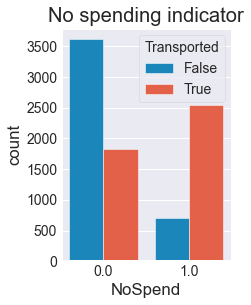

In [18]:
def proc_exp(data):
    """Process expense data for a given DataFrame.
    
    This function calculates the total expense for each passenger in the DataFrame,
    adds a new column to indicate whether the passenger spent any money, and updates
    the existing 'NoSpend' column to set the value to 1 if the total expense is zero.
    
    Args:
        data: A pandas DataFrame containing expense data for passengers.
    
    Returns:
        None.
    """
    data['TotalExpense'] = data['FoodCourt'] + data['VRDeck'] + data[
        'RoomService'] + data['Spa'] + data['ShoppingMall']

    data.loc[(data['TotalExpense'] == 0), 'NoSpend'] = 1
    data.loc[data['NoSpend'].isna(), 'NoSpend'] = 0

# Process expense data for the 'train' DataFrame
proc_exp(train)

# Create a count plot to visualize the 'NoSpend' column
plt.subplot(1, 2, 2)
sns.countplot(data=train, x='NoSpend', hue='Transported')
plt.title('No spending indicator')
fig.tight_layout()

# Note on processing expenses: Normalization and standardization techniques were not successful in lessening the data skew 

In [19]:
# Check for percentage of transported passengers who did not spend money

train[['NoSpend','Transported']].groupby(['NoSpend']).mean().applymap('{:,.2%}'.format)

,Transported
NoSpend,
0.0,33.66%
1.0,78.38%


## **5: Alone or Together: Impact of Group Size on Transported Passengers**

The first graphic shows the count of passengers grouped by the size of their travel group, separated by whether they were transported or not, which helps with the visualization of the size of each travel group and the proportion of those who were transported.

The second graphic polarizes this analysis even more by reducing the comparison from group size to, whether or not the passenger was a solo traveler. 
The plot of group sizes illustrates that most passengers were traveling alone or in a small group of two or three people. 

These two visualizations show that travelling solo was safer than travelling in a group. According to Cutter, Boruff and Shirley (2003), families might have a higher mortality rate during a natural disaster or emergency because they may prioritize staying together and helping each other over evacuating or seeking safety. It is important to note that, in this case, it could also be tied to where the family cabins were located within the spaceship.



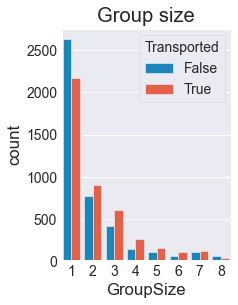

In [20]:
def proc_group(data):
    """
    Processes travel group information for a given dataframe.
    
    Parameters:
    data (pandas.DataFrame): The dataframe to process.
    
    Returns:
    None
    
    """
    # Extracts travel group information from PassengerId
    data['TravelGroup'] = data.PassengerId.apply(
        lambda x: str(x).split('_')).apply(lambda x: x[0]).astype(int)

    # Determines the size of each travel group
    data['GroupSize'] = data['TravelGroup'].map(
        lambda x: data['TravelGroup'].value_counts()[x])

    # Determines if the passenger is a solo traveler
    data['IsSolo'] = np.where(data['GroupSize'] == 1, 1, 0)

proc_group(train)

#plt.figure(figsize=(20,4))
#plt.subplot(1,2,1)
#sns.histplot(data=train, x='TravelGroup', hue='Transported', binwidth=1)
#plt.title('Travel Group')

# Creates a countplot of group sizes
plt.subplot(1, 2, 2)
sns.countplot(data=train, x='GroupSize', hue='Transported')
plt.title('Group size')
fig.tight_layout()

In [21]:
# Check for percentage of transported passengers per group size

train[['GroupSize','Transported']].groupby(['GroupSize']).mean().applymap('{:,.2%}'.format)

,Transported
GroupSize,
1,45.24%
2,53.80%
3,59.31%
4,64.08%
5,59.25%
6,61.49%
7,54.11%
8,39.42%


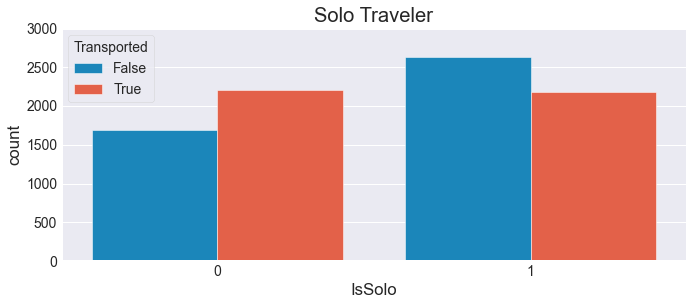

In [22]:
# Set figure size
plt.figure(figsize=(10, 4))

# Create countplot of IsSolo variable with Transported as hue
sns.countplot(data=train, x='IsSolo', hue='Transported')

# Set title
plt.title('Solo Traveler')

# Set y-axis limits
plt.ylim([0, 3000])

# Show the plot
plt.show()

In [23]:
# Check for percentage of transported passengers among solo travelers

train[['IsSolo','Transported']].groupby(['IsSolo']).mean().applymap('{:,.2%}'.format)

,Transported
IsSolo,
0,56.69%
1,45.24%


## **6: Unlocking the Secrets of Passenger Survival: Insights from Cabin Analysis**


---
The Cabin variable is further analyzed to extract useful information which can potentially provide insights into passenger survival. In order to analyze the variable, the data must first be processed, therefore, missing values were filled and then splitted into separate variables `Deck`, `Number`, and `Side`.

1. `Deck`:  represents the deck on which the passenger's cabin was located
2. `Number`: represents the cabin number. 
3. `Side`: represents the side of the ship on which the cabin was located (port or starboard). 

The analysis was then based on the areas in which the cabins were located based on the range of the cabin numbers. For instance, the graph showed that `Deck` F and G had majority of people transported. `Number` 0-250 and `Side` had most transported passengers.

These features can provide detailed information about the location of a passenger's cabin, which could impact their chances of transportation.

In [24]:
def cabin_proc(data):
    """
    Process the 'Cabin' feature in the Titanic dataset.

    Args:
        data: A pandas DataFrame containing the Titanic dataset.

    Returns:
        A pandas DataFrame with processed 'Cabin' feature.
    """
    # Preliminary fill nulls for cabin.
    data['Cabin'] = data['Cabin'].fillna("X/9999/X")

    # Replace cabin features.
    data['Deck'] = data.Cabin.apply(lambda x: str(x).split('/')).apply(
        lambda x: x[0])
    data['Number'] = data.Cabin.apply(lambda x: x.split('/')).apply(
        lambda x: x[1]).astype(int)
    data['Side'] = data.Cabin.apply(lambda x: str(x).split('/')).apply(
        lambda x: x[2])

    data.drop('Cabin', axis=1, inplace=True)

    # Return nulls for proper imputation.
    data.loc[data['Deck'] == 'X', 'Deck'] = np.nan
    data.loc[data['Number'] == 9999, 'Number'] = np.nan
    data.loc[data['Side'] == 'X', 'Side'] = np.nan

    # Bin cabin numbers.
    data.loc[data['Number'] < 300, 'Area'] = "Area 1"
    data.loc[(data['Number'] >= 300) & (data['Number'] < 600),
             'Area'] = "Area 2"
    data.loc[(data['Number'] >= 600) & (data['Number'] < 900),
             'Area'] = "Area 3"
    data.loc[(data['Number'] >= 900) & (data['Number'] < 1200),
             'Area'] = "Area 4"
    data.loc[(data['Number'] >= 1200) & (data['Number'] < 1500),
             'Area'] = "Area 5"
    data.loc[(data['Number'] >= 1500) & (data['Number'] < 1800),
             'Area'] = "Area 6"
    data.loc[data['Number'] >= 1800, 'Area'] = "Area 7"

In [25]:
# Apply the cabin processing function to the train dataset
cabin_proc(train)

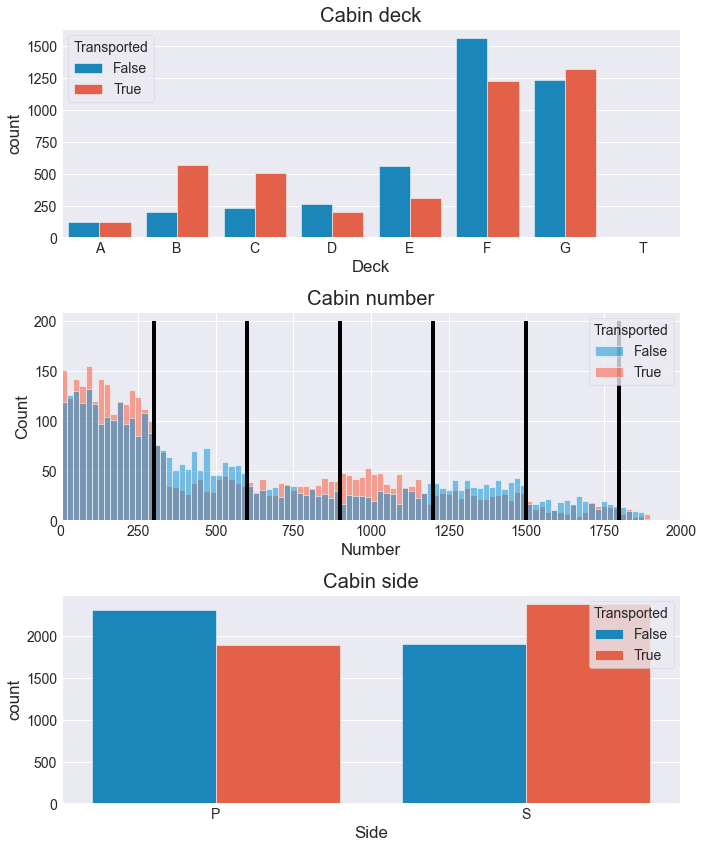

In [26]:

# Create a new figure with a size of 10 inches by 12 inches
fig = plt.figure(figsize=(10, 12))

# Create a subplot with 3 rows, 1 column, and set the current axis to the first subplot
plt.subplot(3, 1, 1)

# Create a countplot of the 'Deck' variable in the 'train' dataframe, 
#with the 'Transported' variable as a hue, and a specific order of the 'Deck' categories
sns.countplot(data=train,
              x='Deck',
              hue='Transported',
              order=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'])

# Set the title of the subplot to 'Cabin deck'
plt.title('Cabin deck')

# Move to the second subplot
plt.subplot(3, 1, 2)

# Create a histogram of the 'Number' variable in the 'train' dataframe,
#with the 'Transported' variable as a hue, and a specific bin width
sns.histplot(data=train, x='Number', hue='Transported', binwidth=20)

# Add vertical lines to the histogram at specific values
plt.vlines(300, ymin=0, ymax=200, color='black')
plt.vlines(600, ymin=0, ymax=200, color='black')
plt.vlines(900, ymin=0, ymax=200, color='black')
plt.vlines(1200, ymin=0, ymax=200, color='black')
plt.vlines(1500, ymin=0, ymax=200, color='black')
plt.vlines(1800, ymin=0, ymax=200, color='black')

# Set the title of the subplot to 'Cabin number'
plt.title('Cabin number')

# Set the x-axis limits for the histogram
plt.xlim([0, 2000])

# Move to the third subplot
plt.subplot(3, 1, 3)

# Create a countplot of the 'Side' variable in the 'train' dataframe, 
#with the 'Transported' variable as a hue
sns.countplot(data=train, x='Side', hue='Transported')

# Set the title of the subplot to 'Cabin side'
plt.title('Cabin side')

# Adjust the layout of the subplots to prevent overlapping
fig.tight_layout()


In [27]:
# Check for percentage of transported passengers among cabin areas

train[['Area','Transported']].groupby(['Area']).mean().applymap('{:,.2%}'.format)

,Transported
Area,
Area 1,53.82%
Area 2,41.20%
Area 3,54.30%
Area 4,60.58%
Area 5,42.00%
Area 6,41.09%
Area 7,43.75%


In [28]:
# Check for percentage of transported passengers among cabin decks

train[['Deck','Transported']].groupby(['Deck']).mean().applymap('{:,.2%}'.format)

,Transported
Deck,
A,49.61%
B,73.43%
C,68.01%
D,43.31%
E,35.73%
F,43.99%
G,51.62%
T,20.00%


In [29]:
# Check for percentage of transported passengers among cabin sides

train[['Side','Transported']].groupby(['Side']).mean().applymap('{:,.2%}'.format)

,Transported
Side,
P,45.13%
S,55.50%


In [30]:
###This visualizations were used in the making of this report, however did not
#provide sufficient insights to be required in the analysis report. 



#train.plot(lw=0,
#          marker=".",
#         subplots=True,
#           layout=(-1, 3),
#           figsize=(12, 6),
#           markersize=5)
#plt.tight_layout()

# Create a figure with two subplots
#fig = plt.figure(figsize=(12, 4))

# Plot a histogram of total expenditure
#plt.subplot(1, 2, 1)
#sns.histplot(data=train, x='TotalExpense', hue='Transported', bins=200)
#plt.title('Total expenditure')
#plt.ylim([0, 200])
# plt.xlim([0, 20000])


Plotting heatmaps to visualize the correlations between the variables helped identifying that there are is no multicolinearity. It allowed to treat the variables independently since they had no relationship among themselves.

This was useful in the development of the Predictive Model.


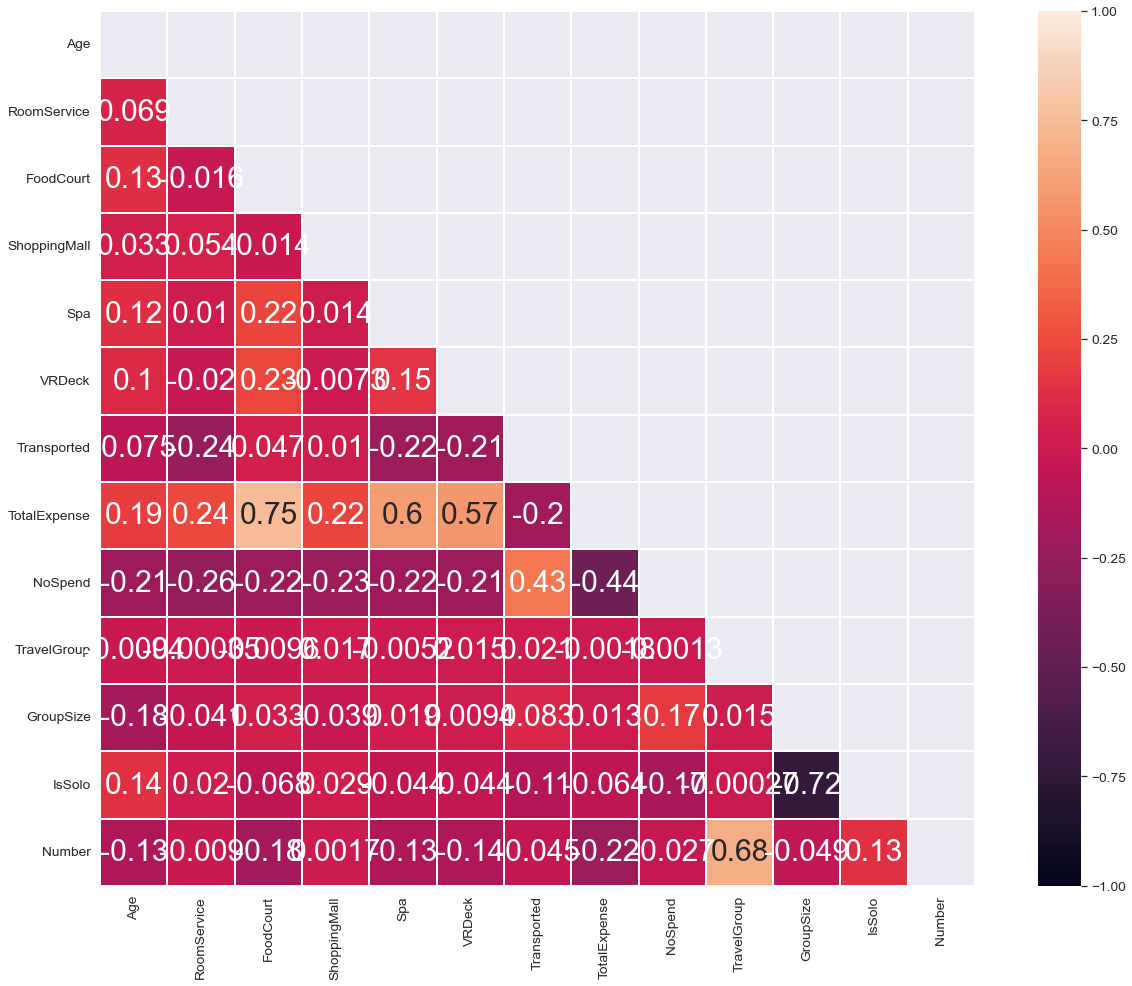

In [31]:
# Generate a heatmap of the correlation matrix for the 'train' dataset
get_heatmap(train)

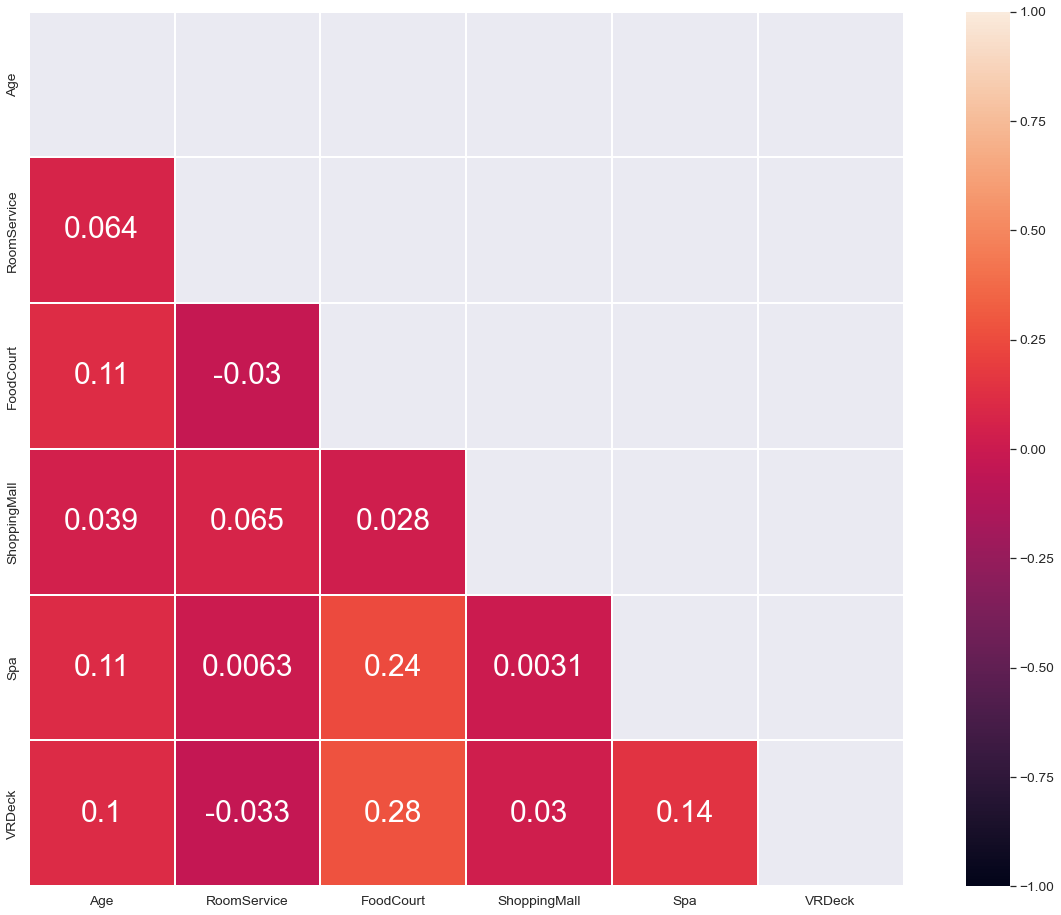

In [32]:
# Generate a heatmap of the correlation matrix for the 'test' dataset
get_heatmap(test)

# MODEL DESIGN

The Data Scientists used machine learning to design a total of four predictive models to predict which passengers were transported in the anomaly. The predictive models used were:
1. Logistic Regression or LogReg: are frequently used in machine learning and data analysis to solve binary classification issues, in which the goal is to predict the likelihood of an event occurring based on a set of input features (Brownlee, 2020).

2. K Nearest Neighbors or KNN: is a well-known machine learning technique that is used to solve classification and regression problems. It works by locating the k closest instances in the training data to a new data point and then predicting the class or value of the new point using the majority class or average value of its k nearest neighbors. The value of k is a user-defined parameter that specifies how many neighbors to take into account. The kNN algorithm is easy to use and has been successfully applied to a variety of real-world issues(Kumar and Rani, 2016).

3. Random Forest or RF: is a machine learning method popular for classification and regression tasks. It entails building a large number of decision trees on randomly picked subsets of the input data, then merging their predictions to generate a final result. Because each tree is trained on a different subset of the data and characteristics, the approach is designed to reduce overfitting and boost accuracy. Furthermore, Random Forest can easily handle high-dimensional data and is widely considered as a stable and effective machine learning method. It has been used to a wide range of real-world challenges with encouraging results in many cases (Tuzova, Dylov and Kalinina, 2016)

4. Gradient Booster or GBC: is a machine learning approach used to solve classification and regression problems. It operates by generating a series of decision trees iteratively, with each succeeding tree attempting to repair the faults committed by the prior trees. To put it another way, it optimizes the model by minimizing a given loss function. Gradient Boosting is well-known for its high predictive accuracy, particularly when applied to large datasets. It is capable of handling a wide range of data types, including continuous and categorical variables, and is frequently used in real-world applications such as web search ranking and image identification (Natekin and Knoll, 2013).

Based on the results of these models, the data scientists determined that the ensemble methods provided better prediction accuracy. According to Zhu, Jin, Ying, Wang, Liu and Huan (2019) HistGradientBoostClassifier or HGBC is a large-scale classification problem-solving hierarchical gradient boosting classifier. In this case, the HGBC performed better than any other model because it can handle much more complicated features as well as interactions between the different variables


Text(0.5, 1.0, 'Number of unique home planets per group')

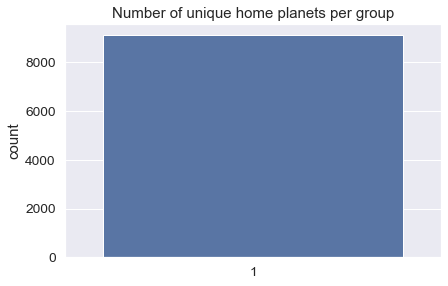

In [33]:
# Imputation

# Read train and test data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Functions for initial cleaning


def process_data(data):
    """
    Process the given data by performing various data wrangling and feature engineering steps.

    Parameters:
    -----------
    data : pandas.DataFrame
        The input data to be processed.

    Returns:
    --------
    pandas.DataFrame
        The processed data with new features added and missing values imputed.
    """

    # Binning age
    data.loc[data['Age'] <= 12, 'AgeBin'] = "0-12"
    data.loc[(data['Age'] >= 13) & (data['Age'] <= 17), 'AgeBin'] = "13-17"
    data.loc[(data['Age'] >= 18) & (data['Age'] <= 25), 'AgeBin'] = "18-25"
    data.loc[(data['Age'] >= 26) & (data['Age'] <= 30), 'AgeBin'] = "26-30"
    data.loc[(data['Age'] >= 31) & (data['Age'] <= 50), 'AgeBin'] = "31-50"
    data.loc[data['Age'] > 50, 'AgeBin'] = "51 and above"

    # Expenditure features
    data['TotalExpense'] = data['FoodCourt'] + data['VRDeck'] + data[
        'RoomService'] + data['Spa'] + data['ShoppingMall']

    # No spend
    data.loc[(data['TotalExpense'] == 0), 'NoSpend'] = 1
    data.loc[data['NoSpend'].isna(), 'NoSpend'] = 0

    # Preliminary fill nulls for cabin
    data['Cabin'] = data['Cabin'].fillna("X/9999/X")

    # Replace cabin features
    data['Deck'] = data.Cabin.apply(lambda x: str(x).split('/')).apply(
        lambda x: x[0])
    data['Number'] = data.Cabin.apply(lambda x: x.split('/')).apply(
        lambda x: x[1]).astype(int)
    data['Side'] = data.Cabin.apply(lambda x: str(x).split('/')).apply(
        lambda x: x[2])

    data.drop('Cabin', axis=1, inplace=True)

    # Return nulls for proper imputation
    data.loc[data['Deck'] == 'X', 'Deck'] = np.nan
    data.loc[data['Number'] == 9999, 'Number'] = np.nan
    data.loc[data['Side'] == 'X', 'Side'] = np.nan

    # Bin cabin numbers

    data.loc[data['Number'] < 300, 'Area'] = "Area 1"
    data.loc[(data['Number'] >= 300) & (data['Number'] < 600),
             'Area'] = "Area 2"
    data.loc[(data['Number'] >= 600) & (data['Number'] < 900),
             'Area'] = "Area 3"
    data.loc[(data['Number'] >= 900) & (data['Number'] < 1200),
             'Area'] = "Area 4"
    data.loc[(data['Number'] >= 1200) & (data['Number'] < 1500),
             'Area'] = "Area 5"
    data.loc[(data['Number'] >= 1500) & (data['Number'] < 1800),
             'Area'] = "Area 6"
    data.loc[data['Number'] >= 1800, 'Area'] = "Area 7"

    # Travel group
    data['TravelGroup'] = data.PassengerId.apply(
        lambda x: str(x).split('_')).apply(lambda x: x[0]).astype(int)

    # Travel group size
    data['GroupSize'] = data['TravelGroup'].map(
        lambda x: data['TravelGroup'].value_counts()[x])

    # Solo traveler
    data['IsSolo'] = np.where(data['GroupSize'] == 1, 1, 0)

    # Name imputation

    data['Name'].fillna('John Doe', inplace=True)

    data['Surname'] = data['Name'].str.split().str[-1]

    data['FamilySize'] = data['Surname'].map(
        lambda x: data['Surname'].value_counts()[x])

    # Return nulls

    data.loc[data['Surname'] == 'Doe', 'Surname'] = np.nan
    data.loc[data['FamilySize'] > 100, 'FamilySize'] = np.nan

    # Drop unneeded columns
    data.drop('Name', axis=1, inplace=True)

    return data

def missing_vals(data):
    """
    Returns a DataFrame containing the total number and percentage of missing 
    values in each column of the input DataFrame.

    Parameters:
    data (pandas.DataFrame): The input DataFrame to be checked for missing values.

    Returns:
    pandas.DataFrame: A DataFrame containing two columns: 'Total Count', 
    which indicates the total number of missing values in each column, 
    and 'Percentage', which indicates the percentage of missing values in each column.
    """
    total_nulls = data.isnull().sum().sort_values(ascending=False)
    perc_nulls = (round(data.isnull().sum() * 100 / data.isnull().count(),
                        3)).sort_values(ascending=False)

    missing = pd.concat([total_nulls, perc_nulls],
                        axis=1,
                        keys=['Total Count', 'Percentage'])
    return missing

process_data(train)
process_data(test)

x_train = train.drop('Transported', axis=1)
y_train = train['Transported']
x_data = pd.concat([x_train, test], axis=0).reset_index(drop=True)

GHP_grp = x_data.groupby(['TravelGroup', 'HomePlanet'
                          ])['HomePlanet'].size().unstack().fillna(0)

sns.countplot((GHP_grp > 0).sum(axis=1))
plt.title('Number of unique home planets per group')

<AxesSubplot:xlabel='Deck', ylabel='HomePlanet'>

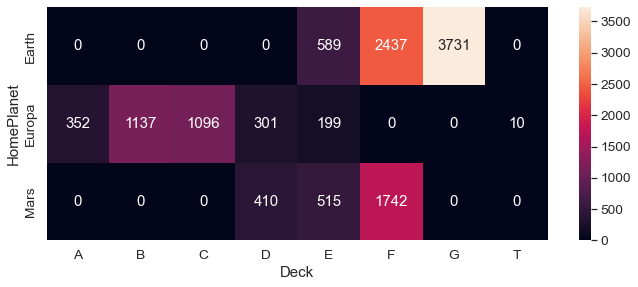

In [34]:
# Binning home planet based on travel group and deck
#get indices of rows with null HomePlanet where the TravelGroup is in the GHP_grp index
GHP_index = x_data[x_data['HomePlanet'].isna()][(
    x_data[x_data['HomePlanet'].isna()]['TravelGroup']).isin(
        GHP_grp.index)].index

# Fill null HomePlanet values using the GHP_grp index and TravelGroup
x_data.loc[GHP_index, 'HomePlanet'] = x_data.iloc[
    GHP_index, :]['TravelGroup'].map(lambda x: GHP_grp.idxmax(axis=1)[x])

# Group data by Deck and HomePlanet, fill null HomePlanet values based on Deck
DHP_grp = x_data.groupby(['Deck', 'HomePlanet'
                          ])['HomePlanet'].size().unstack().fillna(0)

# Fill null HomePlanet values with 'Europa' for Decks A, B, C, and T, and 'Earth' for Deck G
x_data.loc[(x_data['HomePlanet'].isna()) &
           (x_data['Deck'].isin(['A', 'B', 'C', 'T'])),
           'HomePlanet'] = 'Europa'

x_data.loc[(x_data['HomePlanet'].isna()) & (x_data['Deck'] == 'G'),
           'HomePlanet'] = 'Earth'

# Plot heatmap of DHP_grp
plt.figure(figsize=(10, 4))
sns.heatmap(DHP_grp.T, annot=True, fmt='g')

Text(0.5, 1.0, 'Number of unique planets per surname')

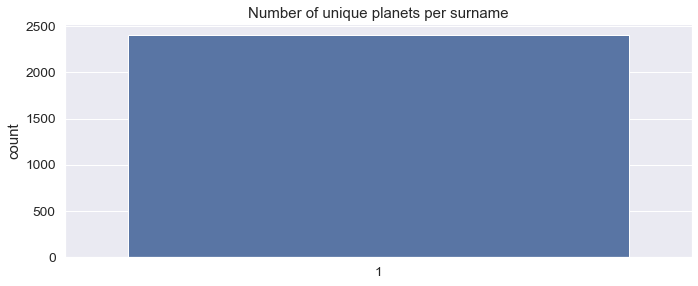

In [35]:
# Group the x_data by 'Surname' and 'HomePlanet', count the size of 'HomePlanet',
#unstack the resulting DataFrame and fill any NaN values with 0
SHP_grp = x_data.groupby(['Surname', 'HomePlanet'
                          ])['HomePlanet'].size().unstack().fillna(0)

# Create a figure with size 10 x 4
plt.figure(figsize=(10, 4))

# Create a count plot of the number of unique planets per surname, using the result of
#(SHP_grp > 0).sum(axis=1) as the input data
sns.countplot((SHP_grp > 0).sum(axis=1))

# Set the title of the plot to 'Number of unique planets per surname'
plt.title('Number of unique planets per surname')

<AxesSubplot:xlabel='HomePlanet', ylabel='Destination'>

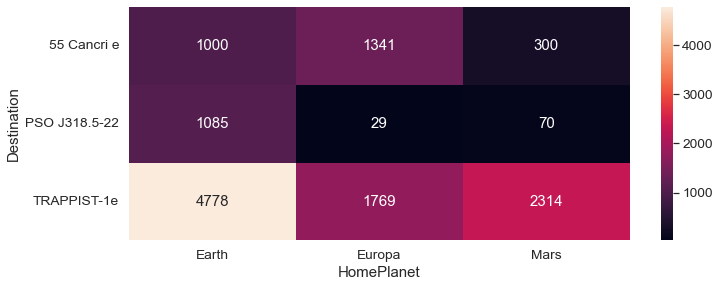

In [36]:
# Fill missing values in the 'HomePlanet' column using the mode of the 'Surname' groups

# Get the indices of rows with missing 'HomePlanet' values and where the 'Surname' belongs to a 'HomePlanet' group
SHP_index = x_data[x_data['HomePlanet'].isna()][(
    x_data[x_data['HomePlanet'].isna()]['Surname']).isin(SHP_grp.index)].index

# Fill the missing 'HomePlanet' values with the mode of the corresponding 'Surname' group
x_data.loc[SHP_index, 'HomePlanet'] = x_data.iloc[SHP_index, :]['Surname'].map(
    lambda x: SHP_grp.idxmax(axis=1)[x])

# Group the data by 'HomePlanet' and 'Destination', count the number of occurrences of 'Destination' for each group,
# and convert the resulting Series to a DataFrame with missing values filled with zeros
HPD_grp = x_data.groupby(['HomePlanet', 'Destination'
                          ])['Destination'].size().unstack().fillna(0)

# Create a heatmap of the resulting DataFrame
plt.figure(figsize=(10, 4))
sns.heatmap(HPD_grp.T, annot=True, fmt='g')

Text(0.5, 1.0, 'Number of unique surnames by group')

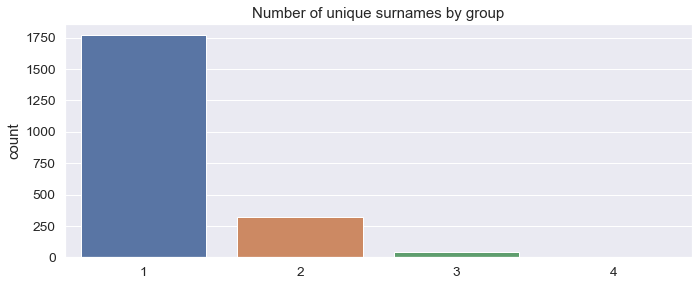

In [37]:
# Fill missing 'HomePlanet' values where the 'Deck' is not 'D' with 'Earth', and where the 'Deck' is 'D' with 'Mars'
x_data.loc[(x_data['HomePlanet'].isna()) & ~(x_data['Deck'] == 'D'), 'HomePlanet'] = 'Earth'
x_data.loc[(x_data['HomePlanet'].isna()) & (x_data['Deck'] == 'D'), 'HomePlanet'] = 'Mars'

# Fill missing 'Destination' values with 'TRAPPIST-1e'
x_data.loc[(x_data['Destination'].isna()), 'Destination'] = 'TRAPPIST-1e'

# Group the data by 'TravelGroup' and 'Surname', count the number of unique 'Surname' values for each group,
# and convert the resulting Series to a DataFrame with missing values filled with zeros
GSN_grp = x_data[x_data['GroupSize'] > 1].groupby(['TravelGroup', 'Surname'])['Surname'].size().unstack().fillna(0)

# Create a count plot of the number of unique surnames by group
plt.figure(figsize=(10, 4))
sns.countplot((GSN_grp > 0).sum(axis=1))
plt.title('Number of unique surnames by group')

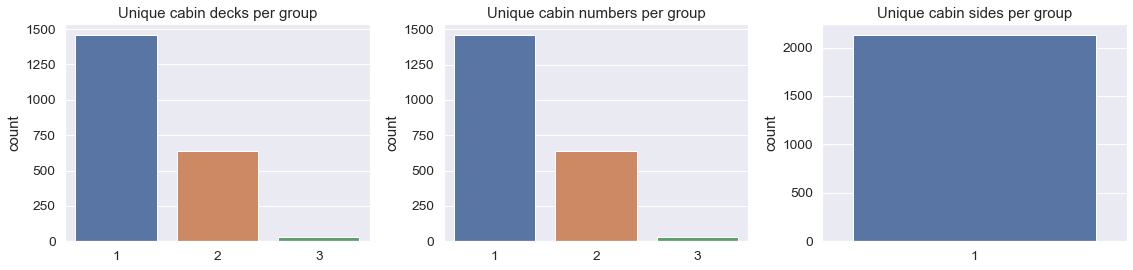

In [38]:
# Calculate GSN_index where Surname is null and TravelGroup is in GSN_grp index
GSN_index = x_data[x_data['Surname'].isna()][(
    x_data[x_data['Surname'].isna()]['TravelGroup']).isin(GSN_grp.index)].index

# Fill null Surname with the corresponding GSN_grp value for the TravelGroup
x_data.loc[GSN_index, 'Surname'] = x_data.iloc[
    GSN_index, :]['TravelGroup'].map(lambda x: GSN_grp.idxmax(axis=1)[x])

# Fill remaining null Surname values with 'Doe'
x_data['Surname'].fillna('Doe', inplace=True)

# Calculate FamilySize based on count of Surname values
x_data['FamilySize'] = x_data['Surname'].map(
    lambda x: x_data['Surname'].value_counts()[x])

# Set Surname values that were previously filled with 'Doe' back to null
x_data.loc[x_data['Surname'] == 'Doe', 'Surname'] = np.nan

# Set FamilySize values greater than 100 to 0
x_data.loc[x_data['FamilySize'] > 100, 'FamilySize'] = 0

# Group data by TravelGroup, Deck, Number, and Side and calculate counts of each
GCD_grp = x_data[x_data['GroupSize'] > 1].groupby(
    ['TravelGroup', 'Deck'])['Deck'].size().unstack().fillna(0)
GCN_grp = x_data[x_data['GroupSize'] > 1].groupby(
    ['TravelGroup', 'Number'])['Number'].size().unstack().fillna(0)
GCS_grp = x_data[x_data['GroupSize'] > 1].groupby(
    ['TravelGroup', 'Side'])['Side'].size().unstack().fillna(0)

# Create a figure with three subplots showing the count of 
#unique cabin decks, numbers, and sides per group
fig = plt.figure(figsize=(16, 4))
plt.subplot(1, 3, 1)
sns.countplot((GCD_grp > 0).sum(axis=1))
plt.title('Unique cabin decks per group')

plt.subplot(1, 3, 2)
sns.countplot((GCN_grp > 0).sum(axis=1))
plt.title('Unique cabin numbers per group')

plt.subplot(1, 3, 3)
sns.countplot((GCS_grp > 0).sum(axis=1))
plt.title('Unique cabin sides per group')
fig.tight_layout()

In [39]:
# Fill in missing values in 'Side' column based on 'TravelGroup' or 'Surname'
GCS_index = x_data[x_data['Side'].isna()][
    (x_data[x_data['Side'].isna()]['TravelGroup']).isin(GCS_grp.index)].index
x_data.loc[GCS_index, 'Side'] = x_data.iloc[GCS_index, :]['TravelGroup'].map(
    lambda x: GCS_grp.idxmax(axis=1)[x])

SCS_grp = x_data[x_data['GroupSize'] > 1].groupby(
    ['Surname', 'Side'])['Side'].size().unstack().fillna(0)

SCS_index = x_data[x_data['Side'].isna()][
    (x_data[x_data['Side'].isna()]['Surname']).isin(SCS_grp.index)].index
x_data.loc[SCS_index, 'Side'] = x_data.iloc[SCS_index, :]['Surname'].map(
    lambda x: SCS_grp.idxmax(axis=1)[x])

# Fill in remaining missing values in 'Side' column with 'Z'
x_data.loc[x_data['Side'].isna(), 'Side'] = 'Z'

# Fill in missing values in 'Deck' column based on 'TravelGroup'
GCD_index = x_data[x_data['Deck'].isna()][
    (x_data[x_data['Deck'].isna()]['TravelGroup']).isin(GCD_grp.index)].index
x_data.loc[GCD_index, 'Deck'] = x_data.iloc[GCD_index, :]['TravelGroup'].map(
    lambda x: GCD_grp.idxmax(axis=1)[x])

# Fill in remaining missing values in 'Deck' column with mode of 'Deck' column 
#grouped by 'HomePlanet', 'Destination', and 'IsSolo'
x_data.groupby(['HomePlanet', 'Destination', 'IsSolo', 'Deck'])[
    'Deck'].size().unstack().fillna(0)
na_rows_CD = x_data.loc[x_data['Deck'].isna(), 'Deck'].index
x_data.loc[x_data['Deck'].isna(), 'Deck'] = x_data.groupby(
    ['HomePlanet', 'Destination', 'IsSolo'])['Deck'].transform(
    lambda x: x.fillna(pd.Series.mode(x)[0]))[na_rows_CD]

# Use linear regression to fill in missing values in 'Number' column based on 
#'TravelGroup' and 'Deck'
for deck in ['A', 'B', 'C', 'D', 'E', 'F', 'G']:
    X_CN = x_data.loc[~(x_data['Number'].isna()) & (x_data['Deck'] == deck),
                      'TravelGroup']
    y_CN = x_data.loc[~(x_data['Number'].isna()) & (x_data['Deck'] == deck),
                      'Number']
    X_test_CN = x_data.loc[(x_data['Number'].isna()) &
                           (x_data['Deck'] == deck), 'TravelGroup']
    model_CN = LinearRegression()
    model_CN.fit(X_CN.values.reshape(-1, 1), y_CN)
    preds_CN = model_CN.predict(X_test_CN.values.reshape(-1, 1))
    x_data.loc[(x_data['Number'].isna()) & (x_data['Deck'] == deck),
               'Number'] = preds_CN.astype(int)

## Group cabins per area by binning cabin numbers
# Cabin number less than 300 belongs to Area 1
# Cabin number between 300 and 599 belongs to Area 2
# Cabin number between 600 and 899 belongs to Area 3
# Cabin number between 900 and 1199 belongs to Area 4
# Cabin number between 1200 and 1499 belongs to Area 5
# Cabin number between 1500 and 1799 belongs to Area 6
# Cabin number greater than or equal to 1800 belongs to Area 7

x_data.loc[x_data['Number'] < 300, 'Area'] = "Area 1"
x_data.loc[(x_data['Number'] >= 300) & (x_data['Number'] < 600),
           'Area'] = "Area 2" 
x_data.loc[(x_data['Number'] >= 600) & (x_data['Number'] < 900),
           'Area'] = "Area 3" 
x_data.loc[(x_data['Number'] >= 900) & (x_data['Number'] < 1200),
           'Area'] = "Area 4"
x_data.loc[(x_data['Number'] >= 1200) & (x_data['Number'] < 1500),
           'Area'] = "Area 5"
x_data.loc[(x_data['Number'] >= 1500) & (x_data['Number'] < 1800),
           'Area'] = "Area 6" 
x_data.loc[x_data['Number'] >= 1800, 'Area'] = "Area 7" 

# Impute age with median age of subgroup defined by 
#HomePlanet, NoSpend, IsSolo and Deck
na_rows_A = x_data.loc[x_data['Age'].isna(), 'Age'].index
x_data.loc[x_data['Age'].isna(), 'Age'] = x_data.groupby(
    ['HomePlanet', 'NoSpend', 'IsSolo',
     'Deck'])['Age'].transform(lambda x: x.fillna(x.median()))[na_rows_A] 

# Binning age
# Age less than or equal to 12 belongs to AgeBin 0-12
# Age between 13 and 17 belongs to AgeBin 13-17
# Age between 18 and 25 belongs to AgeBin 18-25
# Age between 26 and 30 belongs to AgeBin 26-30
# Age between 31 and 50 belongs to AgeBin 31-50
 # Age greater than 50 belongs to AgeBin 51 and above 

x_data.loc[x_data['Age'] <= 12, 'AgeBin'] = "0-12" 
x_data.loc[(x_data['Age'] >= 13) & (x_data['Age'] <= 17), 'AgeBin'] = "13-17"
x_data.loc[(x_data['Age'] >= 18) & (x_data['Age'] <= 25), 'AgeBin'] = "18-25" 
x_data.loc[(x_data['Age'] >= 26) & (x_data['Age'] <= 30), 'AgeBin'] = "26-30" 
x_data.loc[(x_data['Age'] >= 31) & (x_data['Age'] <= 50), 'AgeBin'] = "31-50"
x_data.loc[x_data['Age'] > 50, 'AgeBin'] = "51 and above"

# If VIP value is null, set it to False
x_data.loc[x_data['VIP'].isna(), 'VIP'] = False 

# Impute cryosleep based on mode of no spend feature
na_rows_CSL = x_data.loc[x_data['CryoSleep'].isna(), 'CryoSleep'].index
x_data.loc[x_data['CryoSleep'].isna(),
           'CryoSleep'] = x_data.groupby(['NoSpend'])['CryoSleep'].transform(
               lambda x: x.fillna(pd.Series.mode(x)[0]))[na_rows_CSL]

## Fill expenses with 0 if in cryosleep; otherwise, fill in with mean based on homeplanet, solo, and agebin subgroups

exp_feats = ['ShoppingMall', 'FoodCourt', 'Spa', 'VRDeck', 'RoomService']

for col in exp_feats:
# Fill expenses with 0 if in cryosleep.
    x_data.loc[(x_data[col].isna()) & (x_data['CryoSleep'] == True), col] = 0

for col in exp_feats:
# Fill missing expenses with the mean based on homeplanet, solo, and agebin subgroups.
    na_rows = x_data.loc[x_data[col].isna(), col].index
    x_data.loc[x_data[col].isna(), col] = x_data.groupby(
        ['HomePlanet', 'IsSolo',
         'AgeBin'])[col].transform(lambda x: x.fillna(x.mean()))[na_rows]

# Sum expenses across all features and add a column for passengers who spend nothing.

x_data['TotalExpense'] = x_data[exp_feats].sum(axis=1)
x_data['NoSpend'] = (x_data['TotalExpense'] == 0).astype(int)

# Drop unneeded columns

x_data.drop(
    ['PassengerId', 'TravelGroup', 'GroupSize', 'AgeBin', 'Number', 'Surname'],
    axis=1,
    inplace=True)

# One-hot encode dummy variables

x_data = pd.get_dummies(x_data)

# Split into train and test data

x_train = x_data.iloc[0:8693]

x_test = x_data[8693:]

X_train, X_valid, Y_train, Y_valid = train_test_split(x_train,
                                                      y_train,
                                                      train_size=0.8,
                                                      test_size=0.2,
                                                      random_state=0)


# Define a dictionary of classifiers with their corresponding instances
classifiers = {
    "LogisticRegression": LogisticRegression(random_state=0),
    "KNN": KNeighborsClassifier(),
    "RandomForest": RandomForestClassifier(random_state=0),
    "GBC": GradientBoostingClassifier(random_state=0),
    "HGBC": HistGradientBoostingClassifier(random_state=0)
}

# Define a grid of hyperparameters for Logistic Regression
LR_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.25, 0.5, 0.75, 1, 1.25, 1.5],
    'max_iter': [50, 100, 150]
}

# Define a grid of hyperparameters for K-Nearest Neighbors
KNN_grid = {'n_neighbors': [3, 5, 7, 9], 'p': [1, 2]}

# Define a grid of hyperparameters for Support Vector Machines
SVC_grid = {
    'C': [0.25, 0.5, 0.75, 1, 1.25, 1.5],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Define a grid of hyperparameters for Random Forest
RF_grid = {
    'n_estimators': [50, 100, 150, 200, 250, 300],
    'max_depth': [4, 6, 8, 10, 12]
}

# Define a grid of hyperparameters for Gradient Boosting Classifier
boosted_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [4, 8, 12],
    'learning_rate': [0.05, 0.1, 0.15]
}

# Define a grid of hyperparameters for Histogram-based Gradient Boosting Classifier
hgbc_grid = {
    'max_iter': [50, 100, 150, 200],
    'max_depth': [4, 8, 12],
    'learning_rate': [0.05, 0.1, 0.15]
}

# Define a dictionary of classifiers with their corresponding hyperparameter grids
grid = {
    "LogisticRegression": LR_grid,
    "KNN": KNN_grid,
    "RandomForest": RF_grid,
    "GBC": boosted_grid,
    "HGBC": hgbc_grid
}

In [40]:
### Grid search commented to reduce runtime ###

#i=0
#for key, classifier in classifiers.items():
#    clf = GridSearchCV(estimator=classifier, param_grid=grid[key], n_jobs=-1, cv=5)
#    clf.fit(X_train, Y_train)
#    best_score = clf.best_score_
#    train_score = clf.score(X_valid, Y_valid)

#    print('Model:', key, 'Score', best_score)
#    print('Train score: ', train_score)
#    i+=1

#grid_1 = GridSearchCV(HistGradientBoostingClassifier(random_state=0), param_grid=grid["HGBC"], n_jobs=-1, cv=5)
#grid_2 = GridSearchCV(GradientBoostingClassifier(random_state=0), param_grid=grid["GBC"], n_jobs=-1, cv=None)
#grid_1.fit(X_train, Y_train)

#train_score = grid_1.score(X_train, Y_train)

#train_score

#grid_1.best_params_

#grid_2.fit(X_train, Y_train)

#train_score = grid_2.score(X_train, Y_train)

#train_score

#grid_2.best_params_



In [41]:
# Model fitting with best parameters

hgbc_model = HistGradientBoostingClassifier(learning_rate=0.05,
                                            max_depth=12,
                                            max_iter=200,
                                            random_state=0)

hgbc_model.fit(X_train, Y_train)

# Model fitting with best parameters

# Create Gradient Boosting Classifier with hyperparameters
gbc_model = GradientBoostingClassifier(learning_rate=0.05,
                                       max_depth=4,
                                       n_estimators=200,
                                       random_state=0)

# Fit model to training data
gbc_model.fit(X_train, Y_train)

# Get feature importances and column labels
importances = list(gbc_model.feature_importances_)
col_labels = x_test.columns.values.tolist()

# Create dictionary and DataFrame to hold labels and importances
dict_test = {"label":col_labels,"importances":importances}
df_test = pd.DataFrame(dict_test, columns=['label','importances'])

# Sort DataFrame by importances
df_test.sort_values(by=['importances'],ascending=False)



,label,importances
6,TotalExpense,0.365509
2,FoodCourt,0.089560
4,Spa,0.079280
5,VRDeck,0.068531
3,ShoppingMall,0.068268
10,HomePlanet_Earth,0.065491
14,CryoSleep_True,0.046040
1,RoomService,0.040097
13,CryoSleep_False,0.026621
24,Deck_E,0.023663


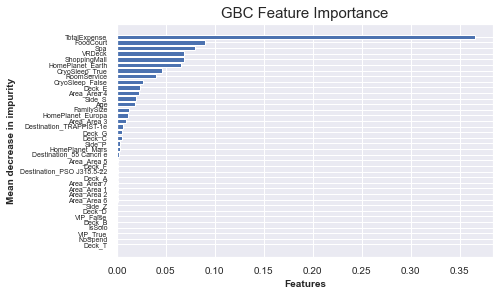

In [42]:
# Creating new variable to save sorted feature importances for further illustration and setting index
df_test_imp = df_test.sort_values(by=['importances'], ascending=True)
df_test_imp.set_index('label', inplace = True)


# Creating a bar plot for feature importance
plt.barh(df_test_imp.index, df_test_imp['importances'].values)

# Customization of the bar chart
plt.title('GBC Feature Importance')
plt.xlabel('Features', fontsize = '10', fontweight='bold')
plt.ylabel("Mean decrease in impurity", fontsize='10',  fontweight='bold', horizontalalignment='center')
plt.xticks(fontsize='10', horizontalalignment='center')
plt.yticks(fontsize = '7')
plt.show()

# Feature importance for the best model was also analyzed to understand which features
#have the bigger weight to predict the possibility of being transported. As we can see
#total expenses are really the most important feature for the model, which means that
#the probability of being trasported depends on wealth.

In [43]:
# Make predictions using HGBC model on test data
hgbc_y = hgbc_model.predict(x_test)

# Reindex test data using Passenger ID column
test.set_index('PassengerId',inplace=True)

# Create DataFrame with predicted values and indices from test data
sub = pd.DataFrame({'Transported': hgbc_y.astype(bool)}, index=test.index)


In [44]:
# Save submission file to CSV
sub.to_csv('final_file.csv')

# CONCLUSION

## Actionable Insights

**1: Designing a safer Spaceship**

As can be seen from both of the Titanic tragedies, passenger demographics and spending power could influence the chances of survival in case of an accident. Those who spent less frequently were transported, the wealthy were more likely to be spared. This is corroborated by the following percentages: 78.38% of passengers with no spending attributed to them were transported, along with 50.63% of non-VIP passengers.

During the analysis, it was found that passengers with a destination of 55 CANCRI E were transported at a larger rate than any other destination. Also, travellers without expenses were always placed on the CabinDeck, which had levels G for passengers from Earth, B for those from Europa, and E or F for those from Mars. Deck levels B and G notably had a large percentage of its occupants be transported, at 73.43% and 51.62% respectively.

In order to lessen and prevent ransportation of passengers to another dimension, it is crucial to take these patterns into account. The team suggests a more even distribution of passengers within the spaceship, since this could make their changes of being transported go down significantly. 

Just like in the first Titanic (Cameron, 1997) those who were VIPs or wealthy were able to afford roomier cabins and even better located ones. Therefore, it is encouraged to study the possibility of reinforcing the construction of the areas of the spaceship that would hold those less wealthy passengers. Furthermore, the study of new materials that would be more protective is also suggested.

**2: Clearing a Path to Safety: an Evacuation Plan in Space**

As reflected in the analysis, large groups were generally transported at a larger rate than solo travelers—64.08%, 59.25%, and 61.49% of 4, 5, and 6-membered travel groups respectively were affected by the anomaly. This is due to their sense of solidarity, but also an ignorance of the evacuation plan. That is why it is suggested to establish a clear plan for emergency response and evacuation, and a training program for crew and passengers during the first day of voyage. 

In the event of an emergency evacuation from a spaceship, crew members should notify everyone on board through an announcement made over the intercom system or other lines of communication by the captain or another designated crew member.

If needed the crew will provide sufficient protective gear and medical kits to the passengers. 

Clear signs should be installed to designate an evacuation path that is easilly followed by passengers in a state of panic. 

In addition, it may be necessary to communicate with a rescue team or perform necessary repairs to ensure passengers' safety, according to the scenario. In conclusion, proper training and familiarity with the spaceship's emergency plan are essential for a safe and effective evacuation before entering the spaceship.


**3: Optimizing Space Travel: Revamping Spaceship Titanic's Route for Efficient Passenger Transportation**

Analysis of the route of the ship showed that it was not utilized to its full potential or in a logistically correct way. The first destination of the Spaceship Titanic was torrid 55 Cancri E, even though this exoplanet is located further away than planets in Trappist-1 which are aroun 40 light-years away from Earth (National Aeronautics and Space Administration [NASA], n.d.). Moreover, the destination for the majority of the passangers was Trappist-1, which means that around 70% of the people could have avoided being transported if they had landed there first. Hence, the route of the ship should be reconsidered; the most popular destinations should be taken into account in order to optimize the route. The proposed route for the ship can be Trappist-1 (40 l.y. away from Earth and final destination of 70,5% of all passengers) - 55 Cancri E (41 l.e. away and destination of 20,4% of passengers) - PSO J318.5-22 (80 l.y. away (SCI News, 2022) and destination of 9,1%). However the data scientist taskforce suggested reasssesing this landing route with each voyage as the destination preference of the passengers might change from one voyage to the next. 

## Conclusion

In conclusion, the analysis of the survival rate from the anomaly suffered by the Spaceship Titanic highlights that passenger demographics and spending power, as well as the location of the passengers' origin, significantly influence their chances of transportation, and these patterns should be considered while designing transportation protocols.

As well as the need for a more thorough training of both crew members and passengers in how to act in case of an emergency. A well-established safety and evacuation plan could have helped save lives in both Titanic tragedies. 

Finally, powerful data analytics, and the collection and analysis of real-time data can overall enhance the performance and efficiency of the spaceship to ensure the safe and successful transportation of passengers across space.

This analysis can be taken as a lesson learned to use predictive analysis for forecasting such incidents in the near and distant future. 


# REFERENCES

Brownlee, J. (2020). Logistic regression for machine learning. Machine Learning Mastery. Retrieved from https://machinelearningmastery.com/logistic-regression-for-machine-learning/

Cameron, J. (Director). (1997). Titanic [Motion picture]. United States: Paramount Pictures.

Cutter, S. L., Boruff, B. J., & Shirley, W. L. (2003). Social vulnerability to environmental hazards. Social Science Quarterly, 84(2), 242–261. https://doi.org/10.1111/1540-6237.8402002

Eaton, J. P., & Haas, C. A. (1994). Titanic: Triumph and tragedy. W. W. Norton & Company.

Kaggle. (2017). Titanic: Machine Learning from Disaster. Retrieved March 8, 2023, from https://www.kaggle.com/c/titanic

Kumar, R., & Rani, V. (2016). k-Nearest Neighbor (kNN) classifier: A popular machine learning algorithm. International Journal of Computer Applications, 142(11). https://doi.org/10.5120/ijca2016912249

Natekin, A., & Knoll, A. (2013). Gradient Boosting Machines, A Tutorial. Frontiers in Neurorobotics, 7, Article 21. https://doi.org/10.3389/fnbot.2013.00021

National Aeronautics and Space Administration (NASA). (n.d.). 55 Cancri e. Exoplanet Exploration: Planets Beyond our Solar System. Retrieved March 2, 2023, from https://exoplanets.nasa.gov/exoplanet-catalog/7005/55-cancri-e/

National Aeronautics and Space Administration (NASA). (n.d.). TRAPPIST-1: An Ultracool Star System. Exoplanet Exploration: Planets Beyond our Solar System. Retrieved March 2, 2023, from https://exoplanets.nasa.gov/trappist1/

SCI News. (2022, February 11). The Science of a Free-Floating Exoplanet. Retrieved March 2, 2023, from https://www.sci.news/astronomy/science-free-floating-exoplanet-01450.html

Tuzova, A. A., Dylov, D. V., & Kalinina, O. V. (2016). Random Forests for Big Data. Procedia Computer Science, 88, 224-231. https://doi.org/10.1016/j.procs.2016.07.008

Zhu, C., Jin, C., Ying, Y., Wang, J., Liu, K., & Huan, J. (2019). HGBC: Hierarchical Gradient Boosting Classifier for Large-Scale Machine Learning Problems. IEEE Transactions on Neural Networks and Learning Systems, 30(7), 2141-2151. https://doi.org/10.1109/TNNLS.2018.2846294







